In [3]:
import numpy as np
import pandas as pd
import uproot as ur

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rc('figure', facecolor='w', figsize=(10,10))
plt.rc('axes', labelsize=24)
plt.rc('axes', titlesize=24)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)   

In [4]:
df_dict = {}

runs = ['1', '2', '3', '4', '501', '502', '503', '6789', 'untag', 'VBF', 'all']

In [5]:
for run in runs:
    df_dict[run] = ur.open(f'../data/james_limits/turnon_v2/likelihood_scans/higgsCombinecat{run}scan.MultiDimFit.mH125.38.root')['limit'].pandas.df()

In [ ]:
df_dict[run].head()

In [ ]:
for run in runs:

    fig, ax = plt.subplots()
    ax.plot(df_dict[run].query('quantileExpected > 0')['r'], 
            2*df_dict[run].query('quantileExpected > 0')['deltaNLL'], color='k', linewidth=2)
    
    ax.axhline(1, color='g', linewidth=2)
    ax.axhline(4, color='y', linewidth=2)
    
    ax.set_xlabel('$\sf \mu$');
    ax.set_ylabel('2$\sf \Delta NLL$');
    
    ax.set_xlim(xmax=20) 
    if run == '503' or run == '6789':
        ax.set_xlim(xmax=40)

    ax.set_ylim(ymin=0,ymax=30)

    ax.grid(linestyle=':')

    plt.tight_layout();
    
    plt.savefig(f'../plots/likelihood_scans/likelihood_scan_unblind_cat_{run}.png')

In [ ]:
for run in runs:
    print(run)
    print(df_dict[run].query('quantileExpected < 0')['r'])

In [6]:
labels = ['channel','category','signal_strength','plus_1_sig','minus_1_sig','plus_2_sig','minus_2_sig']
flatlist = []
for run in runs:
    r_list = df_dict[run].query('quantileExpected > 0')['r'].values
    dnll_list = df_dict[run].query('quantileExpected > 0')['deltaNLL'].values
    r_best_fit = df_dict[run].query('quantileExpected < 0')['r'].values[0]
    r_low_list = r_list[r_list < r_best_fit]
    r_high_list = r_list[r_list > r_best_fit]
    dnll_low_list = dnll_list[r_list < r_best_fit]
    dnll_high_list = dnll_list[r_list > r_best_fit]
    idx_plus_1_sig = np.argmin(np.abs(dnll_high_list - 1))
    idx_plus_2_sig = np.argmin(np.abs(dnll_high_list - 4))
    idx_minus_1_sig = np.argmin(np.abs(dnll_low_list - 1))
    idx_minus_2_sig = np.argmin(np.abs(dnll_low_list - 4))
    
    err_plus_1_sig = r_high_list[idx_plus_1_sig]
    err_plus_2_sig = r_high_list[idx_plus_2_sig]
    err_minus_1_sig = r_low_list[idx_minus_1_sig]
    err_minus_2_sig = r_low_list[idx_minus_2_sig]
    
    flatlist.append(['ele_mu',run,r_best_fit,err_plus_1_sig,err_minus_1_sig,err_plus_2_sig,err_minus_2_sig])
    
    print(run)
    print(err_plus_1_sig)
    print(err_plus_2_sig)
    print(err_minus_1_sig)
    print(err_minus_2_sig)
    print(err_plus_1_sig - r_best_fit)
    print(err_minus_1_sig - r_best_fit)
    
df_sig_strength = pd.DataFrame(flatlist, columns=labels)

1
2.6923077
5.8974357
-2.4358974
-5.0
2.5769894
-2.5512156
2
4.6153846
8.461538
-2.4358974
-5.0
3.3288064
-3.7224755
3
7.179487
11.025641
2.0512822
-0.51282054
2.5665512
-2.5616539
4
7.820513
12.307693
-1.1538461
-5.0
4.650263
-4.3240957
501
2.0512822
5.25641
-3.0769231
-5.0
2.7486033
-2.379602
502
7.179487
14.230769
-4.3589745
-5.0
6.0493526
-5.489109
503
17.435898
20.0
7.179487
2.6923077
5.1731787
-5.083232
6789
26.153847
40.0
-0.3846154
-5.0
13.350272
-13.1881895
untag
3.8461537
6.1538463
0.7692308
-0.7692308
1.4862204
-1.5907025
VBF
5.0
8.076923
-0.3846154
-2.6923077
3.1789546
-2.2056606
all
3.4615386
5.3846154
1.1538461
0.0
1.0609818
-1.2467107


In [ ]:
df_sig_strength.head()

In [7]:
cat_dict = {} 

cat_dict['all'] = 1
cat_dict['VBF'] = 3
cat_dict['503'] = 4
cat_dict['502'] = 5
cat_dict['501'] = 6
cat_dict['untag'] = 8
cat_dict['4'] = 9
cat_dict['3'] = 10
cat_dict['2'] = 11
cat_dict['1'] = 12
cat_dict['6789'] = 14

df_sig_strength['cat_val'] = df_sig_strength.category.map(cat_dict)

In [8]:
scale_dict = {} 

scale_dict['all'] = 1
scale_dict['VBF'] = 1
scale_dict['503'] = 1
scale_dict['502'] = 1
scale_dict['501'] = 1
scale_dict['untag'] = 1
scale_dict['4'] = 1
scale_dict['3'] = 1
scale_dict['2'] = 1
scale_dict['1'] = 1
scale_dict['6789'] = 1/5.

df_sig_strength['cat_scale'] = df_sig_strength.category.map(scale_dict)

In [9]:
offset_dict = {} 

offset_dict['all'] = 0
offset_dict['VBF'] = 0
offset_dict['503'] = 0
offset_dict['502'] = 0
offset_dict['501'] = 0
offset_dict['untag'] = 0
offset_dict['4'] = 0
offset_dict['3'] = 0
offset_dict['2'] = 0
offset_dict['1'] = 0
offset_dict['6789'] = 0

df_sig_strength['cat_offset'] = df_sig_strength.category.map(offset_dict)

In [10]:
label_dict = {} 

label_dict['all'] = 'full combination'
label_dict['VBF'] = 'combined dijet'
label_dict['503'] = 'dijet 3'
label_dict['502'] = 'dijet 2'
label_dict['501'] = 'dijet 1'
label_dict['untag'] = 'combined untagged'
label_dict['4'] = 'untagged 4'
label_dict['3'] = 'untagged 3'
label_dict['2'] = 'untagged 2'
label_dict['1'] = 'untagged 1'
label_dict['6789'] = 'lepton tag'

df_sig_strength['cat_label'] = df_sig_strength.category.map(label_dict)

label_list = ['', 'full combination', '', 'combined dijet', 'dijet 3', 'dijet 2', 'dijet 1', '', 
              'combined untagged', 'untagged 4', 'untagged 3', 'untagged 2', 'untagged 1', '', 'lepton tag / 5', '']

In [27]:
text_dict = {}

text_dict['all'] = '$\sf 2.4^{+1.0}_{-0.9}$'
text_dict['VBF'] = '$\sf 1.8^{+2.1}_{-1.6}$'
text_dict['503'] = '$\sf 12.3^{+3.7}_{-3.5}$'
text_dict['502'] = '$\sf 1.1^{+4.2}_{-3.9}$'
text_dict['501'] = '$\sf -0.7^{+1.8}_{-1.7}$'
text_dict['untag'] = '$\sf 2.4^{+1.1}_{-1.0}$'
text_dict['4'] = '$\sf 3.2^{+3.1}_{-3.0}$'
text_dict['3'] = '$\sf 4.6^{+2.0}_{-1.8}$'
text_dict['2'] = '$\sf 1.3^{+2.5}_{-2.4}$'
text_dict['1'] = '$\sf 0.1^{+1.9}_{-1.7}$'
text_dict['6789'] = '$\sf 12.8^{+9.4}_{-10.0}$'

df_sig_strength['text'] = df_sig_strength.category.map(text_dict)

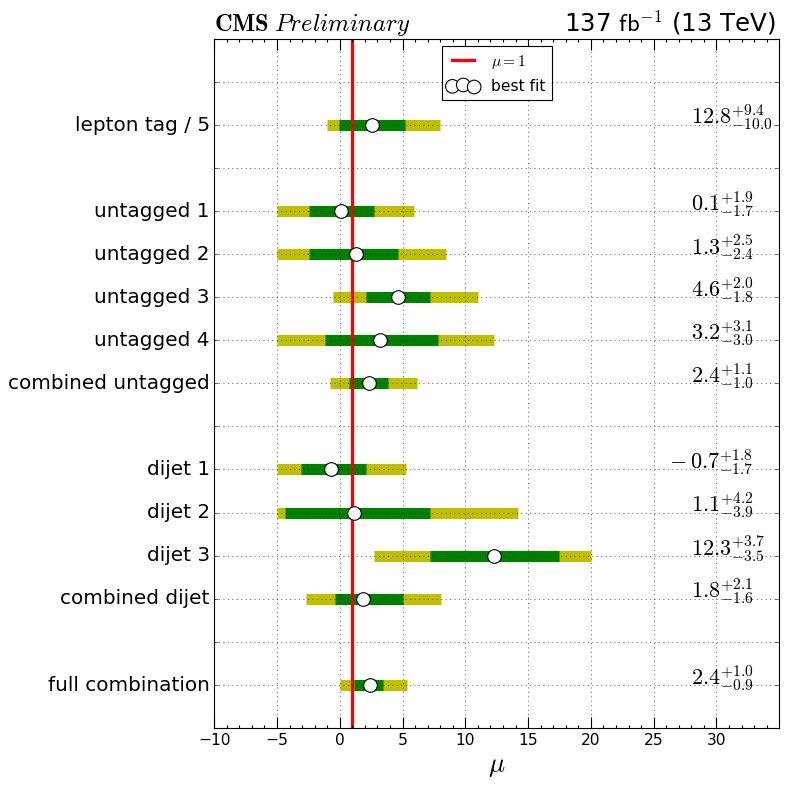

In [31]:
fig, ax = plt.subplots()

ax.errorbar(df_sig_strength.signal_strength*df_sig_strength.cat_scale, df_sig_strength.cat_val + df_sig_strength.cat_offset, 
            xerr=[abs(np.subtract(df_sig_strength.minus_2_sig*df_sig_strength.cat_scale, df_sig_strength.signal_strength*df_sig_strength.cat_scale)),
                  abs(np.subtract(df_sig_strength.plus_2_sig*df_sig_strength.cat_scale, df_sig_strength.signal_strength*df_sig_strength.cat_scale))],
            linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
            color='y', capsize=0, zorder=1);

ax.errorbar(df_sig_strength.signal_strength*df_sig_strength.cat_scale, df_sig_strength.cat_val + df_sig_strength.cat_offset, 
            xerr=[abs(np.subtract(df_sig_strength.minus_1_sig*df_sig_strength.cat_scale, df_sig_strength.signal_strength*df_sig_strength.cat_scale)),
                  abs(np.subtract(df_sig_strength.plus_1_sig*df_sig_strength.cat_scale, df_sig_strength.signal_strength*df_sig_strength.cat_scale))],
            linestyle='None', linewidth=10, marker='None', markersize=5, markerfacecolor='w', markeredgecolor='k',
            color='g', capsize=0, zorder=2);
ax.scatter(df_sig_strength.signal_strength*df_sig_strength.cat_scale, df_sig_strength.cat_val + df_sig_strength.cat_offset, marker='o', c='w', s=150, 
           label='best fit', zorder=3)
#ax.scatter(df_sig_strength.observed*df_sig_strength.cat_scale, df_sig_strength.cat_val + df_sig_strength.cat_offset, marker='o', c='w', s=150, 
#           label='observed (background only)', zorder=3)

ax.axvline(1, color='r', linewidth=3, label='$\sf \mu = 1$')

ax.legend(loc='upper center', prop={'size': 14});

ax.set_xlim(0, 80)
ax.grid(linestyle=':')
ax.set_xlabel('$\sf \mu$')

hzg_llg = r'$\sf H\rightarrow Z\gamma \rightarrow \ell\ell\gamma$'
hzg_mmg = r'$\sf H\rightarrow Z\gamma \rightarrow \mu\mu\gamma$'
hzg_eeg = r'$\sf H\rightarrow Z\gamma \rightarrow ee\gamma$'

ax.set_yticks(np.linspace(0, 15, num=16))

ax.set_yticklabels(label_list)


#ax.set_yticklabels(['', 
#                    hzg_llg, 
#                    hzg_eeg+' dijet ', 
#                    hzg_eeg+' untagged', 
#                    hzg_mmg+' dijet', 
#                    hzg_mmg+' untagged', 
#                    hzg_llg+' lepton / 5'
#                   ])

#ax.set_title('CMS (13 TeV)')
ax.set_xlim(-10, 35.)
ax.tick_params(labelsize=14)
ax.set_title(r'$\sf \bf{CMS} \; \it{Preliminary}$                    137 $\sf fb^{-1}$ (13 TeV)', loc='left', fontsize=22)

ax.set_xticks(np.arange(-10., 35., 5))
ax.set_xticks(np.arange(-10., 35., 1), minor=True)
ax.tick_params(axis='x', length=10, width=1, direction='in')
ax.tick_params(axis='x', length=3, width=1, direction='in', which='minor')
ax.tick_params(axis='y', labelsize=18)

for cat in runs:
    entry = df_sig_strength.query(f'cat_val == {cat_dict[cat]}')
    y_val = entry.cat_val + entry.cat_offset
    text_str = entry.text.values[0]
    if cat == '501':
        ax.text(26, y_val, text_str, fontsize=20)
    else: 
        ax.text(28, y_val, text_str, fontsize=20)


#for i, label in enumerate(ax.xaxis.get_ticklabels()):
#    if i % 4 != 0: 
#        label.set_visible(False)

#ax.xaxis.set_major_formatter(plt.NullFormatter())

plt.tight_layout();
plt.savefig('../plots/per-category_signal_strength_all_james_06-29-21_unblind.png')

In [ ]:
df_sig_strength